In [11]:
from dataclasses import dataclass
from typing import Optional, Tuple

import dm_pix as pix
import equinox as eqx
import jax
import jax.numpy as jnp
import jax.random as jr
import ott.geometry.costs as costs
from ott.geometry.pointcloud import PointCloud
from ott.solvers.linear import sinkhorn

import numpy as np
import matplotlib.pyplot as plt

from utils.datasets import emnist, celeba_attribute


## Emnist data

In [12]:
emnist_source_data, emnist_target_data, emnist_one_hot_src_labels, emnist_one_hot_tgt_labels = emnist('train')

In [36]:
emnist_number_label = np.array(['0', '1', '8'])
emnist_letter_label = np.array(['O', 'I', 'B'])

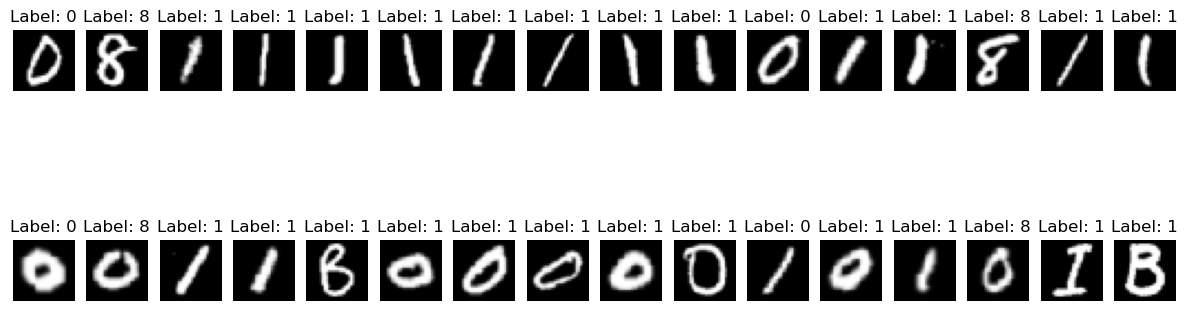

In [44]:
selected_images_idx = np.random.randint(0, 2500, size=16)

fig, axes = plt.subplots(2, len(selected_images_idx), figsize=(15, 5))

batch_emnist_source_data = np.array([emnist_source_data[idx] for idx in selected_images_idx])
batch_emnist_one_hot_src_labels = [emnist_one_hot_src_labels[idx] for idx in selected_images_idx]

batch_emnist_target_data = np.array([emnist_target_data[idx] for idx in selected_images_idx])
batch_emnist_one_hot_tgt_labels = [emnist_one_hot_tgt_labels[idx] for idx in selected_images_idx]

for j in range(len(selected_images_idx)):
    axes[0][j].imshow(batch_emnist_source_data[j, 0], cmap='gray')
    label = emnist_number_label[batch_emnist_one_hot_src_labels[j].astype(bool)][0]
    axes[0][j].set_title(f"Label: {label}")
    axes[0][j].axis('off')
    ####
    axes[1][j].imshow(batch_emnist_target_data[j, 0], cmap='gray')
    label = emnist_number_label[batch_emnist_one_hot_src_labels[j].astype(bool)][0]
    axes[1][j].set_title(f"Label: {label}")
    axes[1][j].axis('off')
    
plt.show()


In [84]:
def sinkhorn_matching( source_batch, 
                      target_batch, 
                      tau_a : float = 1, 
                      tau_b : float = 1, 
                      epsilon=1e-2,
                      log = False):
    B = source_batch.shape[0]
        
    geom = PointCloud(
        jnp.reshape(source_batch, [B, -1]),
        jnp.reshape(target_batch, [B, -1]),
        epsilon=epsilon,
        scale_cost="mean",
        cost_fn=costs.ElasticL1()
    )
    
    ot_out = sinkhorn.solve(geom, tau_a=tau_a, tau_b=tau_b)
    
    transition_matrix = ot_out.matrix
    if log:
        transition_matrix = jnp.log(transition_matrix)
    return transition_matrix

In [85]:
transition_matrix = sinkhorn_matching(batch_emnist_source_data, batch_emnist_target_data)

/tmp/ipykernel_2163327/344453827.py:17: DeprecationWarning: `solve` will be removed in the next release. Please use `ott.solvers.linear.solve()` instead.
  ot_out = sinkhorn.solve(geom, tau_a=tau_a, tau_b=tau_b)


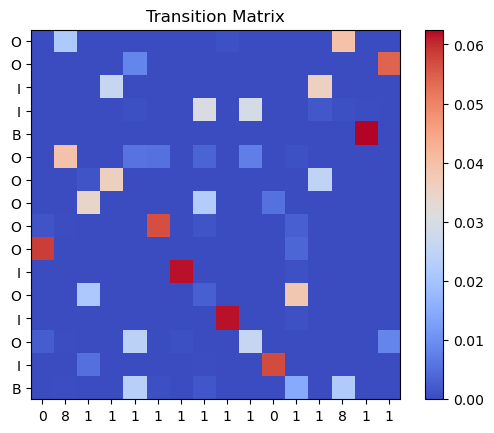

In [86]:
# Plot the transition matrix with a nice colormap
plt.imshow(transition_matrix, cmap='coolwarm')

# Add color bar to show intensity
plt.colorbar()

# Customize x and y axis with custom ticks and labels
xticks = [emnist_number_label[np.array(one_hot).astype(bool)][0] for one_hot in batch_emnist_one_hot_src_labels]
yticks = [emnist_letter_label[np.array(one_hot).astype(bool)][0] for one_hot in batch_emnist_one_hot_tgt_labels]
plt.xticks(np.arange(len(xticks)), xticks)
plt.yticks(np.arange(len(yticks)), yticks)

plt.title('Transition Matrix')
plt.show()

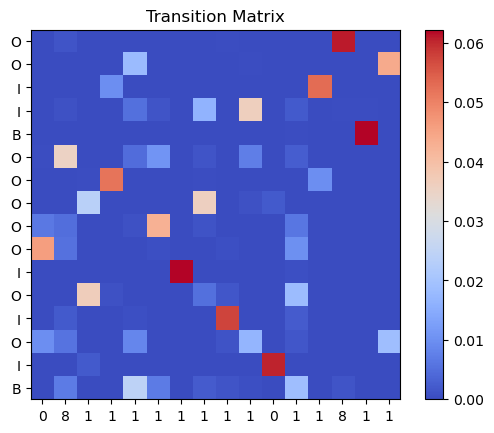

In [83]:
# Plot the transition matrix with a nice colormap
plt.imshow(transition_matrix, cmap='coolwarm')

# Add color bar to show intensity
plt.colorbar()

# Customize x and y axis with custom ticks and labels
xticks = [emnist_number_label[np.array(one_hot).astype(bool)][0] for one_hot in batch_emnist_one_hot_src_labels]
yticks = [emnist_letter_label[np.array(one_hot).astype(bool)][0] for one_hot in batch_emnist_one_hot_tgt_labels]
plt.xticks(np.arange(len(xticks)), xticks)
plt.yticks(np.arange(len(yticks)), yticks)

plt.title('Transition Matrix')
plt.show()